sclaer: https://mkjjo.github.io/python/2019/01/10/scaler.html


In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
import collections

# Other Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

import optuna

import plotly

import umap

In [33]:
train_df = pd.read_csv('./data/train.csv').drop('ID', axis=1)
train_df#.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [34]:
valid_df = pd.read_csv('./data/val.csv').drop('ID', axis=1)
valid_df#.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,...,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,...,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,...,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0


# scaling

In [35]:
v_columns = [f'V{i}' for i in range(1,31)]

In [36]:
scaler = MaxAbsScaler()
scaler.fit(train_df[v_columns])
train_df[v_columns] = scaler.transform(train_df[v_columns])
valid_df[v_columns] = scaler.transform(valid_df[v_columns])

# validation data 분석

In [37]:
colors = ['#0101DF', '#DF0101']

In [38]:
print('No Frauds', round(valid_df['Class'].value_counts()[0]/len(valid_df) * 100,2), '% of the dataset')
print('Frauds', round(valid_df['Class'].value_counts()[1]/len(valid_df) * 100,2), '% of the dataset')

X = valid_df.drop('Class', axis=1)
y = valid_df['Class']

No Frauds 99.89 % of the dataset
Frauds 0.11 % of the dataset


In [39]:
# SMOTE
# print(len(y[y==0]), len(y[y==1]))

# oversampler = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42, n_jobs=-1)
# X, y = oversampler.fit_resample(X, y)

# print(len(y[y==0]), len(y[y==1]))

# X['Class'] = y
# valid_df = X

In [54]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

valid_df = valid_df.sample(frac=1)

fraud_df = valid_df.loc[valid_df['Class'] == 1]
non_fraud_df = valid_df.loc[valid_df['Class'] == 0][:len(fraud_df)*3]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_valid_df = normal_distributed_df.sample(frac=1, random_state=42)

new_valid_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
4490,0.021897,-0.009392,0.029416,0.006978,-0.023455,0.028318,-0.027068,0.005156,-0.044470,0.036342,...,0.015129,-0.004153,-0.213459,0.037336,-0.065209,0.008333,0.001013,0.002095,-0.482314,0
22671,0.001941,0.024563,0.019874,0.268189,0.013689,0.003680,0.016978,-0.004847,-0.149105,0.084114,...,0.103271,-0.005389,0.019610,-0.001520,0.160091,-0.065304,-0.016900,-0.001629,0.683077,0
7702,-0.041407,0.030604,-0.104130,0.132103,-0.084661,0.012110,-0.039382,0.028446,-0.147389,-0.234048,...,0.033466,0.006886,-0.148754,-0.011835,-0.157413,0.063005,0.006115,0.032754,-0.314040,1
20671,0.039689,-0.013054,-0.032207,-0.063136,-0.013219,-0.006328,-0.021385,-0.000693,0.009947,0.031058,...,0.053218,0.003123,0.022942,-0.007401,-0.053990,-0.000647,-0.001520,-0.001055,0.585942,0
15345,-0.348214,0.202244,-0.702567,0.734614,-0.353472,0.032139,-0.635833,-0.233978,-0.667030,-0.775032,...,0.373374,0.057696,0.048475,-0.116052,0.012318,-0.370586,-0.019066,-0.001530,0.176300,1


Distribution of the Classes in the subsample dataset
0    0.75
1    0.25
Name: Class, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


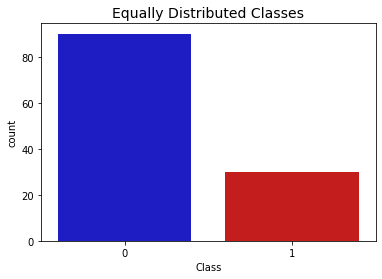

In [55]:
print('Distribution of the Classes in the subsample dataset')
print(new_valid_df['Class'].value_counts()/len(new_valid_df))

sns.countplot('Class', data=new_valid_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

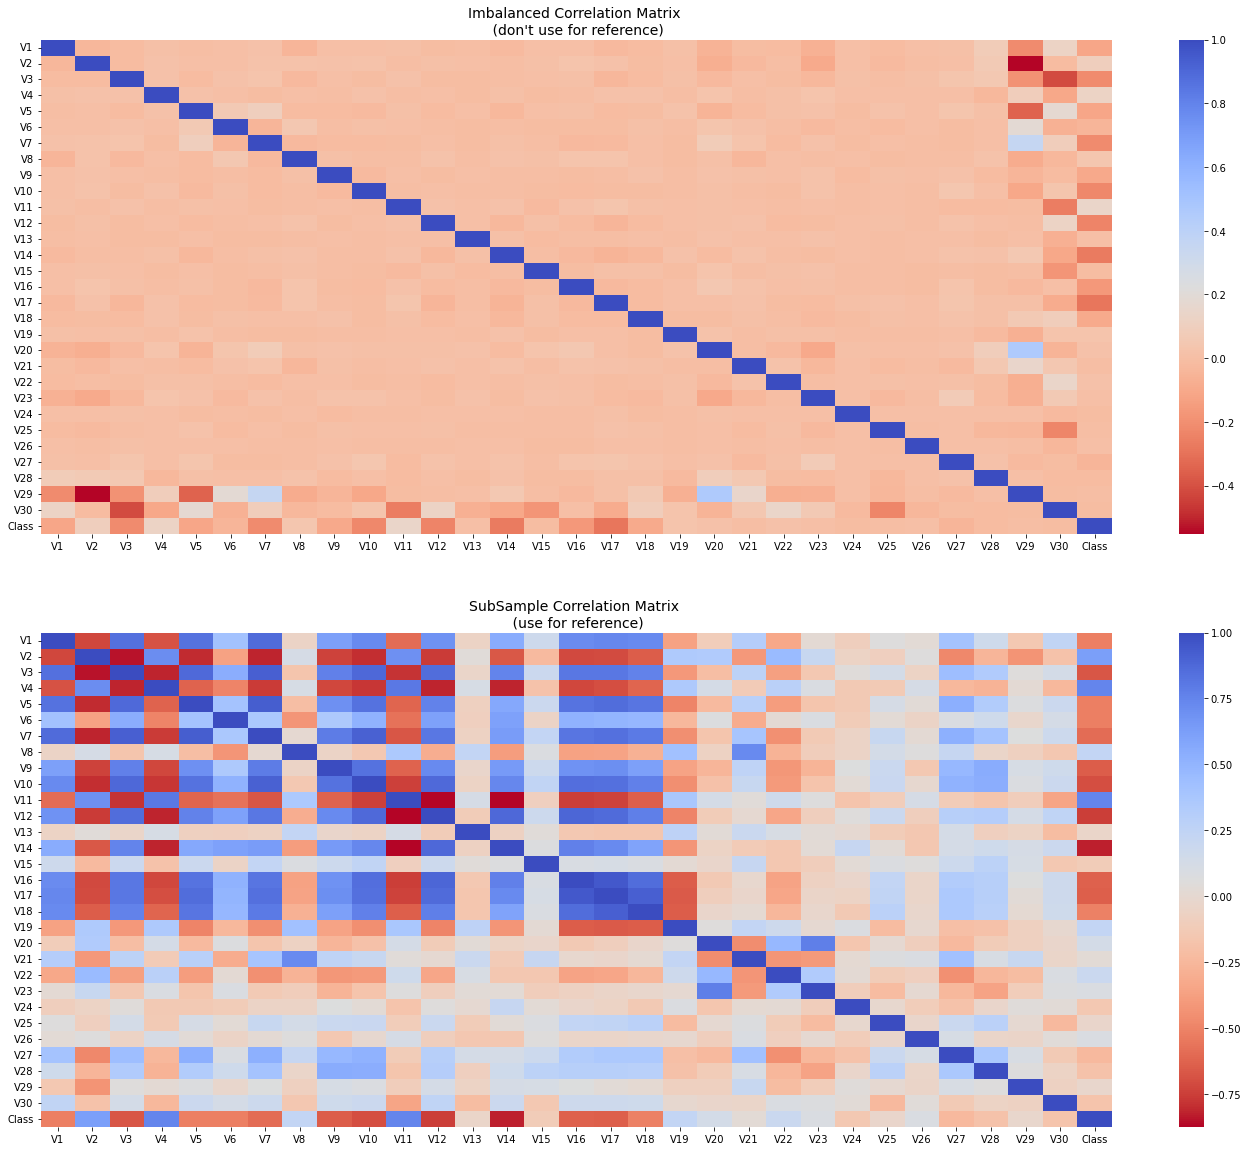

In [56]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = valid_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_valid_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [57]:
key_reverse = list(sub_sample_corr['Class'][:-1].sort_values().keys())

In [58]:
for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values().items()):
    print(idx, k, v)

0 V14 -0.8265246226397697
1 V12 -0.7568162683684484
2 V10 -0.7058468309658386
3 V3 -0.6749792455909146
4 V9 -0.6549642959612474
5 V17 -0.6439731177521403
6 V16 -0.6345396900206057
7 V7 -0.5923478056552
8 V1 -0.5198534286241463
9 V5 -0.5177294862430631
10 V6 -0.5165210464976463
11 V18 -0.5140735466816805
12 V27 -0.24018493087594997
13 V28 -0.18083161816165966
14 V30 -0.17504343908764597
15 V24 -0.14669954014579184
16 V15 -0.11820103616389706
17 V13 -0.040015471038390704
18 V25 -0.031833271738166934
19 V29 -0.022181199825639757
20 V21 0.018863786355535754
21 V26 0.0871839738517664
22 V23 0.09082615237582979
23 V20 0.1338352563647314
24 V22 0.18722815913015597
25 V19 0.2359661035427775
26 V8 0.2364987309641731
27 V2 0.6244446175782601
28 V4 0.7451175195763334
29 V11 0.7470691712135537


In [59]:
a = key_reverse[:12]
b = key_reverse[-3:]
use_columns = a + b
print(a)
print(b)
print(len(use_columns))

['V14', 'V12', 'V10', 'V3', 'V9', 'V17', 'V16', 'V7', 'V1', 'V5', 'V6', 'V18']
['V2', 'V4', 'V11']
15


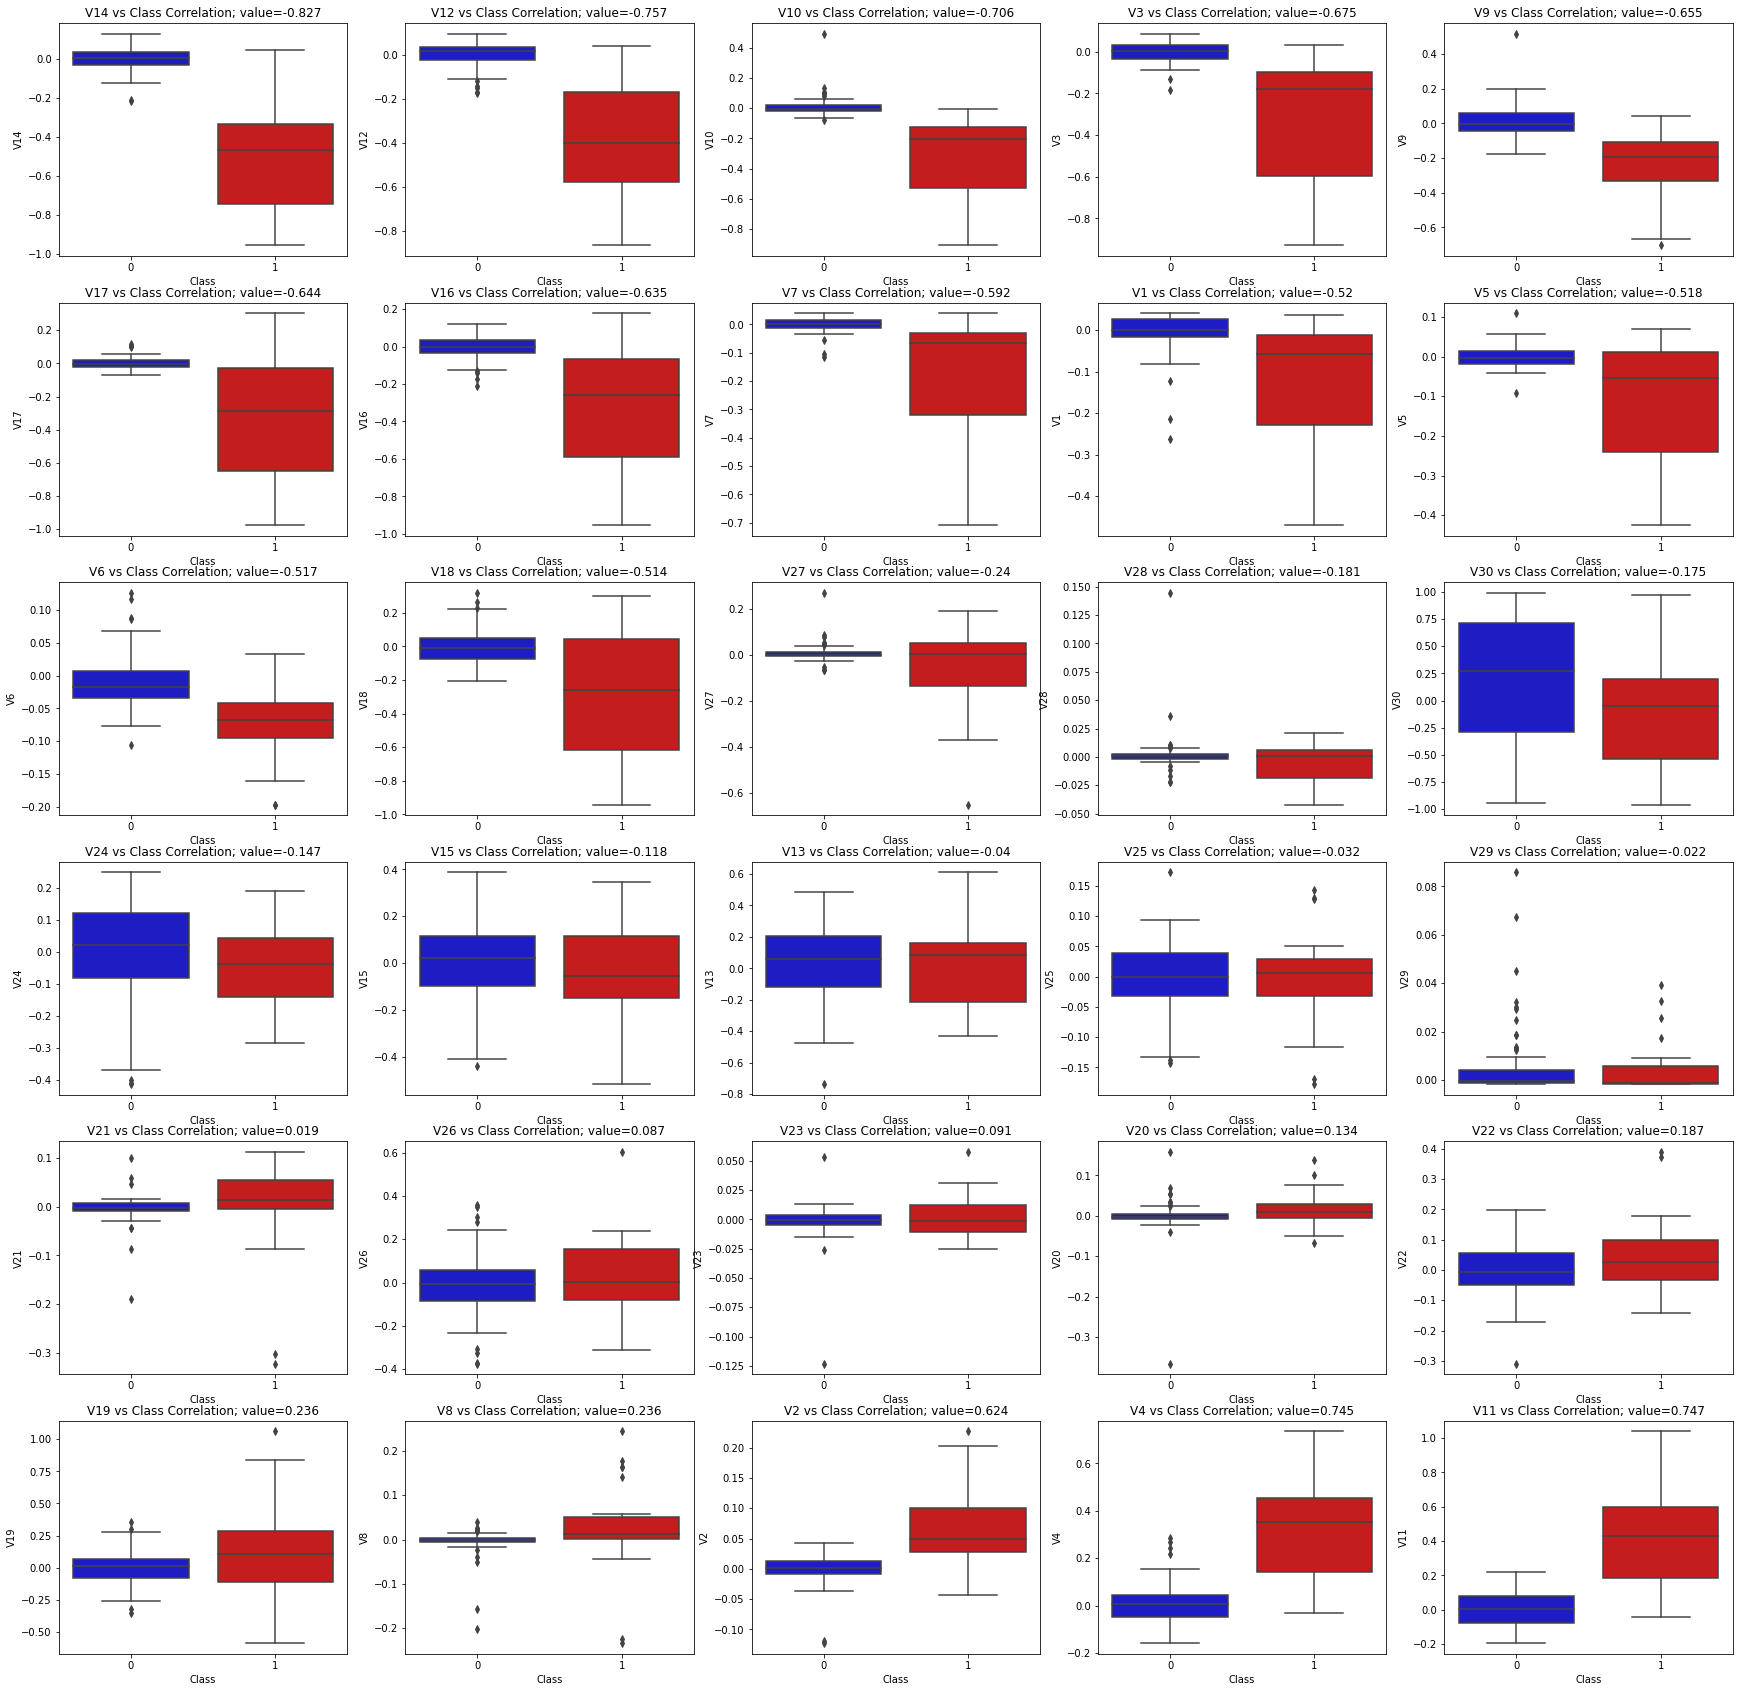

In [60]:
f, axes = plt.subplots(nrows=6, ncols=5, figsize=(30,30))

for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values().items()):
    i, j = divmod(idx, 5)
    sns.boxplot(x="Class", y=k, data=new_valid_df, palette=colors, ax=axes[i, j])
    axes[i,j].set_title(f'{k} vs Class Correlation; value={round(v,3)}')

In [61]:
for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values()[:5].items()):
    v_fraud = new_valid_df[k].loc[new_valid_df['Class']==1].values
    q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    v_iqr = q75 - q25
    print(f'iqr: {v_iqr}')
    
    v_cut_off = v_iqr * 1.5
    v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
    print(f'Cut off: {v_cut_off}')
    print(f'{k} Lower: {v_lower}')
    print(f'{k} upper: {v_upper}')
    
    outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
    print(f'Feature {k} Outliers for Fraud Cases: {len(outliers)}'.format())
    print(f'{k} outliers:{outliers}')

    new_valid_df = new_valid_df.drop(new_valid_df[(new_valid_df[k] > v_upper) | (new_valid_df[k] < v_lower)].index)
    print('Number of Instances after outliers removal: {}'.format(len(new_valid_df)))
    print('----' * 44)

Quartile 25: -0.746733224874017 | Quartile 75: -0.33479639988945925
iqr: 0.4119368249845578
Cut off: 0.6179052374768367
V14 Lower: -1.3646384623508538
V14 upper: 0.2831088375873774
Feature V14 Outliers for Fraud Cases: 0
V14 outliers:[]
Number of Instances after outliers removal: 120
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.5772580118123027 | Quartile 75: -0.1689270624257557
iqr: 0.408330949386547
Cut off: 0.6124964240798205
V12 Lower: -1.1897544358921233
V12 upper: 0.4435693616540648
Feature V12 Outliers for Fraud Cases: 0
V12 outliers:[]
Number of Instances after outliers removal: 120
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.5319465889009106 | Quartile 75: -0.12153552210113205
iqr: 0.4

In [62]:
# New_df is from the random undersample data (fewer instances)
X = new_valid_df.drop('Class', axis=1)[use_columns]
y = new_valid_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='pca').fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


T-SNE took 0.46 s
PCA took 0.00055 s
Truncated SVD took 0.013 s


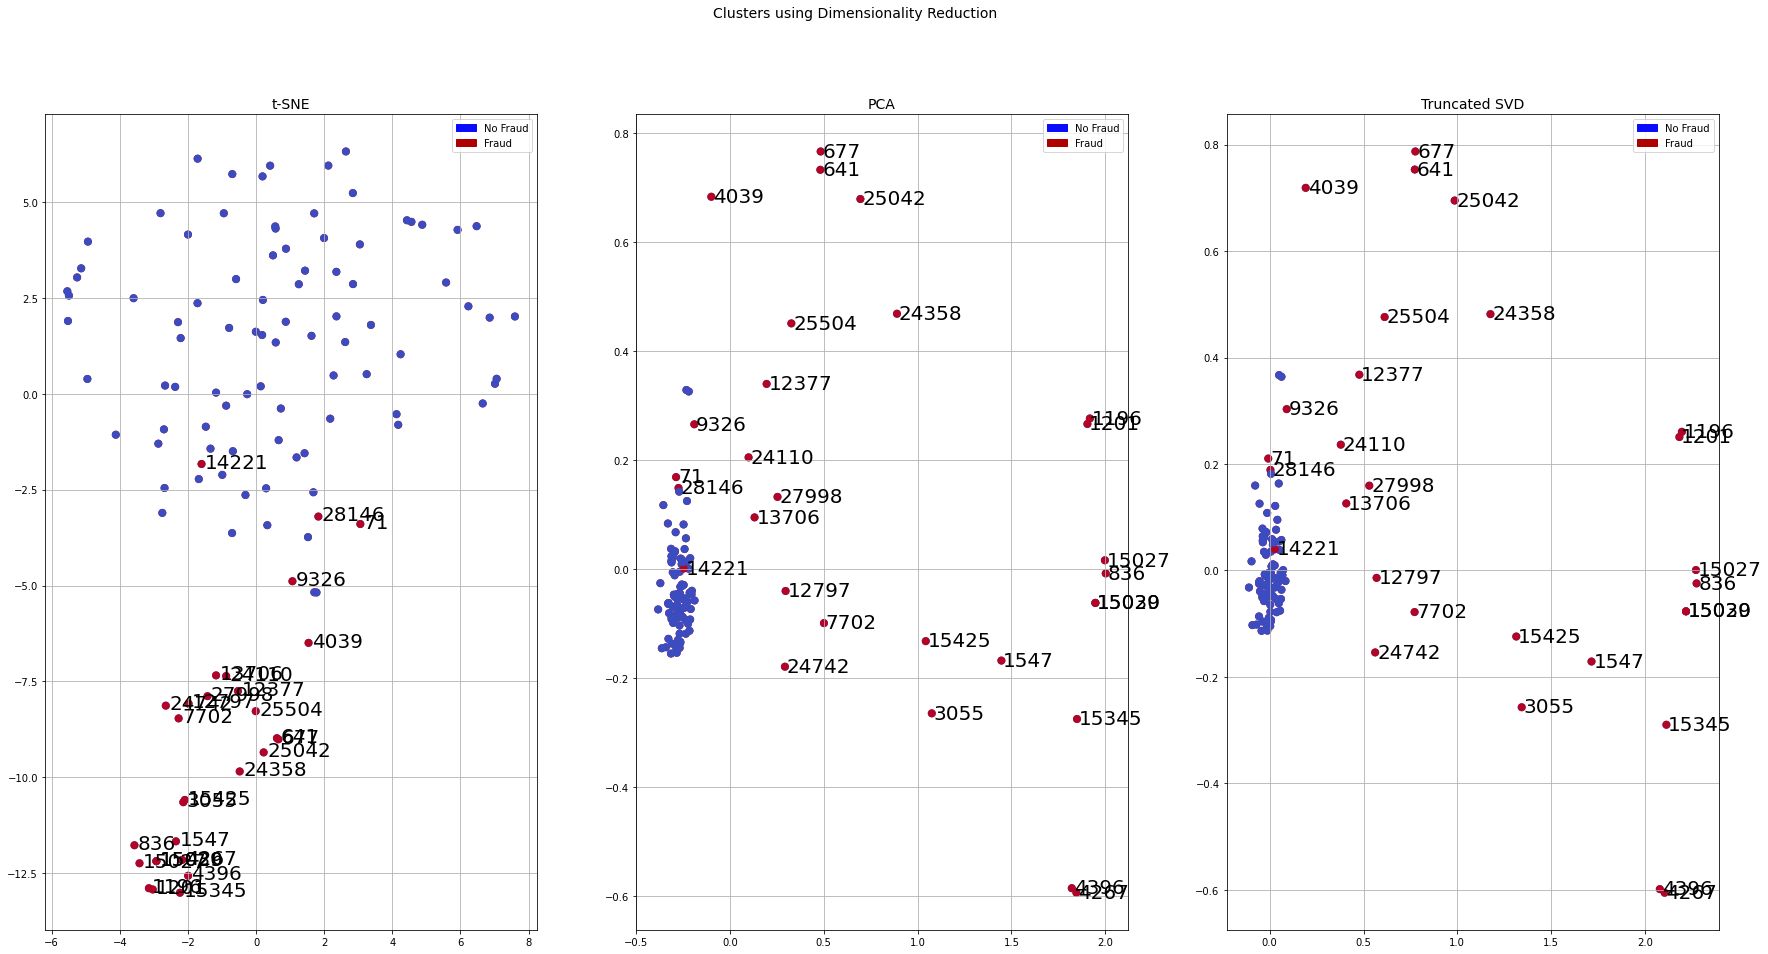

In [63]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,15))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
for i in range(len(y)):
    if y.iloc[i]==1:
        # ax1.text(X_reduced_tsne[i,0], X_reduced_tsne[i,1], s=y.keys()[i], fontsize=15)
        ax1.annotate(y.keys()[i], (X_reduced_tsne[i,0]+0.1, X_reduced_tsne[i,1]-0.1), fontsize=20)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
for i in range(len(y)):
    if y.iloc[i]==1:
        # ax1.text(X_reduced_tsne[i,0], X_reduced_tsne[i,1], s=y.keys()[i], fontsize=15)
        ax2.annotate(y.keys()[i], (X_reduced_pca[i,0]+0.01, X_reduced_pca[i,1]-0.01), fontsize=20)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
for i in range(len(y)):
    if y.iloc[i]==1:
        # ax1.text(X_reduced_tsne[i,0], X_reduced_tsne[i,1], s=y.keys()[i], fontsize=15)
        ax3.annotate(y.keys()[i], (X_reduced_svd[i,0]+0.01, X_reduced_svd[i,1]-0.01), fontsize=20)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### valid 71, 28146, 14221, 9326 은 다른 fraud 집단으로 규정

# KNN labeling

In [21]:
# use_columns = v_columns

In [22]:
print(f'v cnt: {len(use_columns)} ::::', end=' ')
for c in use_columns:
    print(c, sep='', end=' ')

v cnt: 15 :::: V14 V12 V10 V3 V6 V9 V16 V17 V7 V1 V5 V18 V2 V11 V4 

In [23]:
train_df = pd.read_csv('./data/train.csv').drop('ID', axis=1)
valid_df = pd.read_csv('./data/val.csv').drop('ID', axis=1)

In [24]:
train_df = train_df[use_columns]
valid_df = valid_df[use_columns+['Class']]

In [25]:
# X = valid_df.drop('Class', axis=1)
# y = valid_df['Class']

# print(len(y[y==0]), len(y[y==1]))

# oversampler = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42, n_jobs=-1)
# X, y = oversampler.fit_resample(X, y)

# print(len(y[y==0]), len(y[y==1]))

# X['Class'] = y
# valid_df = X

In [26]:
scaler = MaxAbsScaler()
scaler.fit(train_df[use_columns])
train_df[use_columns] = scaler.transform(train_df[use_columns])
valid_df[use_columns] = scaler.transform(valid_df[use_columns])

In [27]:
fraud_ratio = valid_df['Class'].value_counts()[1]/len(valid_df)
fraud_ratio

0.0010540369615627855

In [28]:
X = valid_df.drop('Class', axis=1).values
y = valid_df['Class'].values

In [29]:
# 차원 축소해서 knn으로 라벨링

# reducer = umap.UMAP(n_components=5)
# X = reducer.fit_transform(X)
# X.shape

In [37]:
# plt.scatter(
#     X[:, 0],
#     X[:, 1],
#     c=[sns.color_palette()[x] for x in y])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Fraud dataset', fontsize=24)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='brute', n_jobs=-1)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=1,
                     weights='distance')

In [39]:
# t = reducer.transform(train_df.values)
probs = neigh.predict_proba(train_df.values)

In [40]:
neigh.predict(train_df.values).sum()

121

In [41]:
cnt = 0
train_class = np.zeros(len(train_df), dtype=int)
for idx in np.flip(np.argsort(probs[:,1])):
    cnt += 1
    if probs[idx,1] < 0.5:
        break
    # if probs[idx,1] <= 0:
    #     break
    train_class[idx] = 1
train_df['Class'] = train_class

In [42]:
print(len(train_df[train_df['Class']==1]))
print(len(train_df[train_df['Class']==1])/len(train_df))

121
0.0010628766184712145


# train

In [43]:
X = train_df.drop('Class', axis=1)
y = train_df['Class']

# stratSplit = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

# for train_index, test_index in stratSplit.split(X,y):
#     print("Train:", train_index.shape, "Test:", test_index.shape)
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(len(y_train[y_train==1]), len(y_train[y_train==0]), len(y_train[y_train==1])/len(y_train) * 100)
#     print(len(y_test[y_test==1]), len(y_test[y_test==0]), len(y_train[y_train==1])/len(y_train)* 100)
#     break


In [44]:
# # SMOTE unlael 데이터 확장
# oversampler = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42, n_jobs=-1)
# X, y = oversampler.fit_resample(X, y)

# print(len(y[y==0]), len(y[y==1]))

In [139]:
def RF_objective(trial: optuna.trial.Trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 2000, 2500),
        'max_depth': trial.suggest_int('max_depth', 20, 30),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 700, 1200),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 7),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced']), 
    }
   
    model = RandomForestClassifier(**params,
                                   n_jobs=-1,
                                   random_state=42)

    model.fit(X, y)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1)
    f1_mean = score.mean()

    return f1_mean

In [140]:
#Execute optuna and set hyperparameters
RF_study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
RF_study.optimize(RF_objective, n_trials=10)

[I 2022-07-13 08:46:44,804] A new study created in memory with name: no-name-0778ffad-73f5-42be-9960-2d84a44823b6
[I 2022-07-13 08:48:27,893] Trial 0 finished with value: 0.8404406626382208 and parameters: {'n_estimators': 2224, 'max_depth': 28, 'max_leaf_nodes': 1020, 'min_samples_leaf': 10, 'min_samples_split': 4, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8404406626382208.
[I 2022-07-13 08:50:00,562] Trial 1 finished with value: 0.850331540453627 and parameters: {'n_estimators': 2007, 'max_depth': 22, 'max_leaf_nodes': 1003, 'min_samples_leaf': 7, 'min_samples_split': 7, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.850331540453627.
[I 2022-07-13 08:51:47,118] Trial 2 finished with value: 0.849446483963687 and parameters: {'n_estimators': 2311, 'max_depth': 25, 'max_leaf_nodes': 724, 'min_samples_leaf': 2, 'min_samples_split': 5, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.850331540453627.
[I 2022-07-13 08:53:34,834] Trial 3 finished with 

In [141]:
# optuna.visualization.plot_optimization_history(RF_study).show()

In [142]:
# optuna.visualization.plot_slice(RF_study)

In [143]:
RF_study.best_params

{'n_estimators': 2007,
 'max_depth': 22,
 'max_leaf_nodes': 1003,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'class_weight': 'balanced'}

In [144]:
#Create an instance with tuned hyperparameters
rfc = RandomForestClassifier(**RF_study.best_params,
                              n_jobs=-1,
                              random_state=42)

In [145]:
rfc.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=22,
                       max_leaf_nodes=1003, min_samples_leaf=7,
                       min_samples_split=7, n_estimators=2007, n_jobs=-1,
                       random_state=42)

In [146]:
y_pred = rfc.predict(X)

In [147]:
# rfc.predict_proba(X_test)

In [148]:
print(classification_report(y, y_pred, target_names=['No Frauds', 'Frauds']))

              precision    recall  f1-score   support

   No Frauds       1.00      1.00      1.00    113704
      Frauds       0.95      1.00      0.97       138

    accuracy                           1.00    113842
   macro avg       0.97      1.00      0.99    113842
weighted avg       1.00      1.00      1.00    113842



In [149]:
f1score = classification_report(y, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)['macro avg']['f1-score']
f1score

0.9858979028082302

# inference

In [150]:
test_df = pd.read_csv('./data/test.csv')
ids = test_df['ID']
test_df = test_df[use_columns]

In [151]:
test_df

,V14,V12,V9,V10,V3,V17,V16,V6,V7,V1,V5,V18,V2,V11,V4
0,-0.311169,-0.617801,0.363787,0.090794,2.536347,0.207971,-0.470401,0.462388,0.239599,-1.359807,-0.338321,0.025791,-0.072781,-0.551600,1.378155
1,-0.143772,1.065235,-0.255425,-0.166974,0.166480,-0.114805,0.463917,-0.082361,-0.078803,1.191857,0.060018,-0.183361,0.266151,1.612727,0.448154
2,-1.119670,0.538196,0.817739,0.753074,1.548718,-0.237033,-0.451449,0.095921,0.592941,-1.158233,-0.407193,-0.038195,0.877737,-0.822843,0.403034
3,0.167372,-0.153826,0.464960,-0.099254,0.045371,0.002821,-0.443587,0.272708,-0.005159,1.229658,0.191881,-0.611987,0.141004,-1.416907,1.202613
4,0.362832,-0.326143,-0.558895,0.309755,-0.874300,-0.809979,-0.129487,3.317027,0.470455,0.384978,2.924584,0.359985,0.616109,-0.259116,-0.094019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142498,1.122674,-0.453235,-0.285670,-0.111640,-0.635891,0.939328,-1.431897,-1.014307,0.427126,0.219529,-0.152971,-0.002373,0.881246,-1.109232,0.960928
142499,-0.858719,0.453596,1.159498,-0.594242,1.189786,0.447184,-0.644646,5.519980,-1.518185,-1.775135,1.196063,0.388721,-0.004235,-1.264072,0.331096
142500,-0.675143,0.915802,0.584800,-0.975926,2.035030,-0.025693,-0.711757,1.058415,0.024330,-0.732789,0.868229,-1.221179,-0.055080,-0.150189,-0.738589
142501,-0.510602,0.063119,0.432454,-0.484782,-3.249640,0.313502,0.140716,3.031260,-0.296827,1.919565,2.630515,0.395652,-0.301254,0.411614,-0.557828


In [152]:
test_df[use_columns] = scaler.transform(test_df[use_columns])

In [153]:
y_pred = rfc.predict(test_df)

In [154]:
print(len(y_pred[y_pred==0]))
print(len(y_pred[y_pred==1]))
print(len(y_pred[y_pred==1])/len(y_pred))
inference_fraud_ratio = len(y_pred[y_pred==1])/len(y_pred) * 100
print(inference_fraud_ratio)

142188
315
0.0022104797793730657
0.22104797793730657


In [155]:
test_df['Class'] = y_pred
test_df['ID'] = ids

In [156]:
path = f'./rfc-{round(inference_fraud_ratio,5)}-{round(f1score, 4)}.csv'
print(path)

./rfc-0.22105-0.9859.csv


In [157]:
test_df.to_csv(path, columns=['ID','Class'], index=False)